# Bike Type Image Classification Project

## Introduction

### Purpose

The purpose of the assignment is to perform work using the FastAI library and transfer learning to train a deep neural network to perform image classification using a data set from Kaggle.


### Domain Problem

We want to develop a model to classify a bike based off of what it can see an image, into one of the following riding styles: **Cross Country**, **Downhill**, **Enduro**, **Trail** or **Dirt Jumper**.

### Analytic Approach

The analytic approach can take different forms depending on the goals:

1. **Descriptive approach**: Describe the data using summary statistics and visualizations.

2. **Diagnostic approach**: Use statistical analyses to test hypotheses and make inferences about relationships in the data.

3. **Predictive approach**: Use models to predict trends outside the range of the data.

4. **Prescriptive approach**: Use data to make recommendations for actions.

<br>

Since we will use labeled images of various bike categories to train a classifier how to predict bike types... we will be taking a **predictive approach** throughout this analysis.


## Background Information

Supervised learning is a fundamental branch of machine learning where a model is trained using labeled data—input-output pairs where the correct answer (label) is known. **The goal is for the model to learn the underlying relationship between the inputs and outputs so that it can make accurate predictions on new, unseen data.**

### 2 Problems

There are two main types of problems in supervised learning: **regression and classification**.
- In **regression** problems, the output variable is continuous. For example, predicting house prices based on features like size, location, and number of rooms is a regression task because the price can take on a wide range of numeric values.
- In contrast, **classification problems** involve discrete output variables, where the task is to assign inputs to predefined categories. An example is email spam detection, where the model must classify messages as either "spam" or "not spam."

### Error Messages

Different types of problems also require different **error measures**.
- For **regression**, common metrics include the Mean Squared Error (MSE) or Mean Absolute Error (MAE), which measures the average magnitude of errors in a set of predictions.
- For **classification**, the most common measure for classification models is the error rate or accuracy, which is the fraction of the data points for which the predicted category is incorrect.

### Training and Testing
A critical aspect of supervised learning, especially when fitting highly flexible models like neural networks, is the division of data into **training and testing sets**.
- The **training set** is used to teach the model—this is where the model learns patterns and relationships.
- The **testing set** (or a separate validation set) is used to evaluate how well the model performs on data it has never seen before.

This separation is essential for assessing the model’s ability to generalize.

### Overfitting

One of the primary challenges in supervised learning is **overfitting**, which occurs when a model learns the training data too well, including its noise and outliers, and fails to generalize to new data.

Overfitting results in a model that performs excellently on the training data but poorly on testing data.

Using **separate training and testing sets** helps to detect and prevent overfitting, as it reveals whether the model is truly learning general patterns or merely memorizing the training data. When assessing the error rate for a classification model and we want a model that minimizes the test error rate.

## Set Up

### Check GPU Runtime



The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to Runtime > Change runtime type in the menu to enable a GPU accelerator, and then re-execute the code cell.

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Nov  8 18:39:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Check Runtime Memory Availability


You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via Runtime > Change runtime type in the menu. Then select High-RAM in the Runtime shape toggle button. After, re-execute the code cell.


In [ ]:
import psutil

ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


### Change the Runtime

We want to use the **NVIDIA T4 GPU**

In the menu above click Runtime  →  Change runtime type and change Hardware accelerator to T4 GPU

### Import FastAI Library

Import the `fastai` library

In [ ]:
from fastai.vision.all import *

Import all items from `fastcore.all`

In [ ]:
from fastcore.all import *

## Data Collection

This project utilizes one Kaggle folder downloaded from the website.

### Data Sources

- **Bike Ads (images, prices, specifications)**

  - Denoted in this notebook as **bike_ads**, this data set contains information from 10,052 bicycle advertisements in June 2020. Such as the ad title, main image, condition, and specification details (brand, color, frame, size, etc.) of the bike in the images.

  - Imported from the Kaggle data set, [Bike Ads](https://www.kaggle.com/datasets/tysonpo/bike-ads-images-prices-specifications), we will use the images and specification attributes to train our model to classify bike types and riding styles.

  - The dataset is available for commercial/research purposes under a [Creative Commons Corporation - CC0 1.0 Universal License](https://creativecommons.org/publicdomain/zero/1.0/). There is no copyright for this data.
  



- **Supplemental Bike Images** (if needed,)

  - Denoted in this notebook as **extra_images**, this is a self-made collection of bike images created to ensure that all bike types in our classification problem are covered
  
  - We first need to anlayze what bike types are represented in the primary Kaggle dataset ...

## Data Processing

### Bike Ads (from Kaggle)

Download and get the path to the folders inside

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tysonpo/bike-ads-images-prices-specifications")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'bike-ads-images-prices-specifications' dataset.
Path to dataset files: /kaggle/input/bike-ads-images-prices-specifications


See what files are inside the data set folder

In [ ]:
!ls /kaggle/input/bike-ads-images-prices-specifications

combined_price-only.csv  data_bike_exchange.json  data_ebay.json  images


This data set houses multiple files that contain information we want to use to classify bike types.

We will load each one in and take a peak and the data.

#### Load necessay files

##### **Load in the `data_ebay.json` file and see what it looks like**

When we tried to load in the data like we normally we would, this ouputted an error.

Since this file contains multiple JSON records concatenated together, we cannot import it as if it were a sibgular object with a simple `json.load()`.

Instead we will load in this data by reading it line- by-line... using json.loads() for each entry.

In [ ]:
import json
import pandas as pd

data_ebay_path = "/kaggle/input/bike-ads-images-prices-specifications/data_ebay.json"

# Read the file line by line
records = []
with open(data_ebay_path, 'r') as f:
    for line in f:
        line = line.strip()
        if line:  # ignore blank lines
            try:
                records.append(json.loads(line))
            except json.JSONDecodeError:
                pass  # skip malformed rows if any

print("Number of records loaded:", len(records))

Number of records loaded: 8070


**Convert this data into a data frame: `ebay_df`**

In [ ]:
# Convert to DataFrame
ebay_df = pd.DataFrame(records)
ebay_df.head()

Title  \
0                           2018 Giant Defy Advanced 3 Road Bike - Sm - Reg. $1650   
1                                 Carbon Italian road bike Guerciotti DX50 Ultegra   
2            Cervelo Soloist 56cm Road Bike Shimano Ultegra Components Recent Tune   
3  Cervelo Soloist Road Race Bike 54 cm Shimano Ultegra 2 x 9 Speed WH-R540 Wheels   
4                                          🔥 Miyata 600GT Road-touring Bike 54cm 🔥   

       Price  \
0  $1,399.99   
1  $2,995.00   
2  $1,049.00   
3    $929.35   
4    $199.00   

                                                                                                                                                    Product URL  \
0                                 https://www.ebay.com/itm/2018-Giant-Defy-Advanced-3-Road-Bike-Sm-Reg-1650/313120833364?hash=item48e774bf54:g:RjgAAOSwIGlejMyW   
1                                 https://www.ebay.com/itm/Carbon-Italian-road-bike-Guerciotti-DX50-Ultegra/174323459292?hash=item28967ce4dc:g:PNcAAOSwb65e4kVe   
2            https://www.ebay.com/itm/Cervelo-Soloist-56cm-Road-Bike-Shimano-Ultegra-Components-Recent-Tune/193527617504?hash=item2d0f2517e0:g:4BMAAOSw6ahe5Qtf   
3  https://www.ebay.com/itm/Cervelo-Soloist-Road-Race-Bike-54-cm-Shimano-Ultegra-2-x-9-Speed-WH-R540-Wheels/264769180143?hash=item3da57911ef:g:A2UAAOSwEfJe7QGY   
4                                              https://www.ebay.com/itm/Miyata-600GT-Road-touring-Bike-54cm/303601561478?hash=item46b0102f86:g:hmcAAOSwPUBe7jzi   

   ID                                                          Photo URL  \
0   0  https://i.ebayimg.com/thumbs/images/g/RjgAAOSwIGlejMyW/s-l225.jpg   
1   2  https://i.ebayimg.com/thumbs/images/g/PNcAAOSwb65e4kVe/s-l225.jpg   
2   3  https://i.ebayimg.com/thumbs/images/g/4BMAAOSw6ahe5Qtf/s-l225.jpg   
3   4  https://i.ebayimg.com/thumbs/images/g/A2UAAOSwEfJe7QGY/s-l225.jpg   
4   5  https://i.ebayimg.com/thumbs/images/g/hmcAAOSwPUBe7jzi/s-l225.jpg   

  Condition  \
0      Used   
1      Used   
2      Used   
3      Used   
4      Used   

                                                                                                                                                                                                                     Seller notes  \
0                                                                                                                                                                          Demo bicycles with blemishes and manufacture warranty.   
1                                                                                                                                                                                                                              NA   
2                                                                                                                                                                                                                              NA   
3  Great Condition - Frame, fork and components have some wear and light blemishes from previous use and age.\n\nInspected, serviced and detailed by The Bicycle Guys team of professional mechanics.   See pictures for details.   
4                                                                                                   Well used 1980's steel touring bike with expected wear and tear. Drivetrain, tubes, maybe tires probably need to be replaced.   

  Wheel Size Modified Item            Model  ... Rear Shock Casette Modell  \
0       650B            No  Defy Advanced 3  ...        NaN     NaN    NaN   
1        NaN           NaN              NaN  ...        NaN     NaN    NaN   
2        NaN           NaN              NaN  ...        NaN     NaN    NaN   
3       700C           NaN          Soloist  ...        NaN     NaN    NaN   
4       700c           NaN     Miyata 600GT  ...        NaN     NaN    NaN   

  Produktart Radtyp Customised Scooter Type Suitable For Batterys Marca  
0        NaN    Na

**Summary:** The code above read in each JSON record line-by-line and then built a Python list (reocrds) where each entry was one bike listing.

This was then converted into a data frame for us to easily perform our initial anlysis.

##### **Load in the `images/` folder**

We want to load in the images now so we an make sure the images actually load correctly and are of decent quality (resolutions, backgrounds, lighting, etc.)

['7981.jpg', '6234.jpg', '3863.jpg', '6241.jpg', '150766874.jpg']


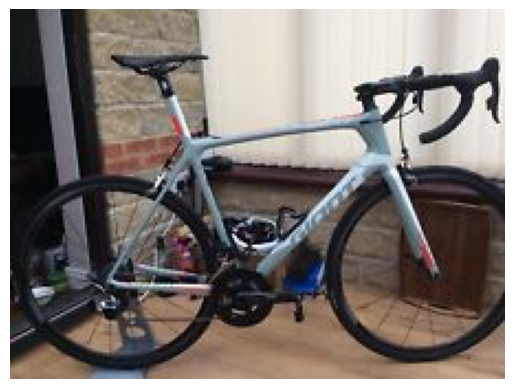

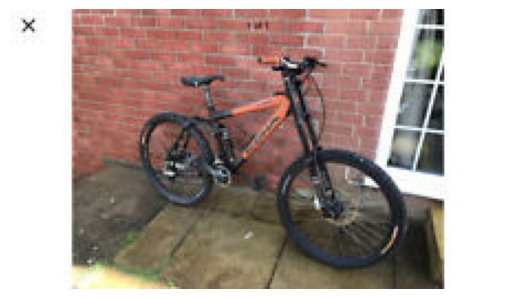

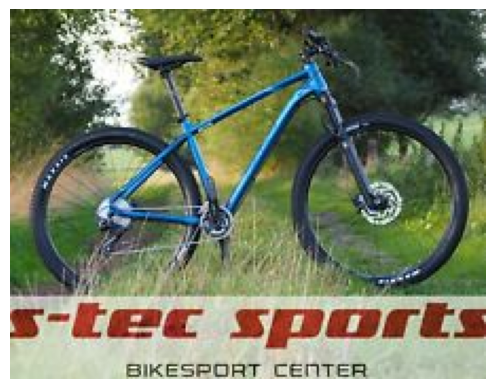

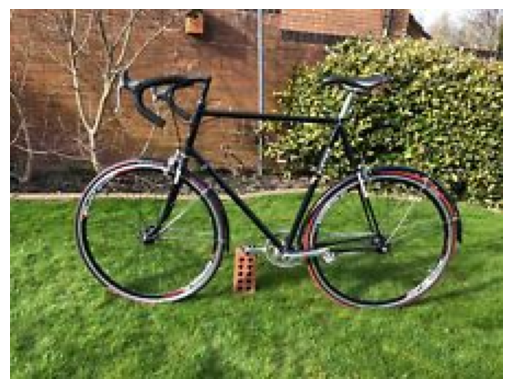

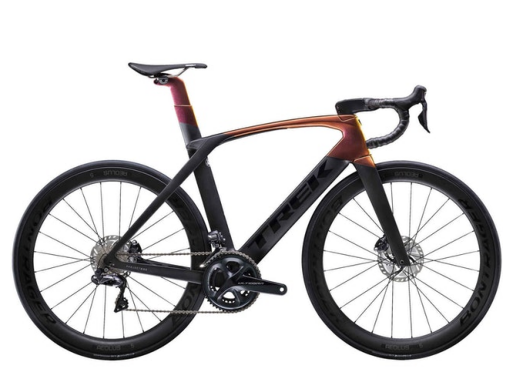

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

image_folder = "/kaggle/input/bike-ads-images-prices-specifications/images"

# List first few image filenames
files = os.listdir(image_folder)[:5]
print(files)

# Display a few images
for f in files:
    path = os.path.join(image_folder, f)
    try:
        img = Image.open(path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error loading {f}: {e}")


##### **Load in the `data_bike_exchange.json` file**

In [ ]:
import json
import pandas as pd

data_bikex_path = "/kaggle/input/bike-ads-images-prices-specifications/data_bike_exchange.json"

# Read the file line by line
records = []
with open(data_bikex_path, 'r') as f:
    for line in f:
        line = line.strip()
        if line:  # ignore blank lines
            try:
                records.append(json.loads(line))
            except json.JSONDecodeError:
                pass  # skip malformed rows if any

print("Number of records loaded:", len(records))


Number of records loaded: 1982


**Convert the data file into a data frame: `bikex_df`**

In [ ]:
# Convert to DataFrame
bikex_df = pd.DataFrame(records)
bikex_df.head()

Title  \
0      2018 Heavily Upgraded Cannondale Jekyll 2    
1             Specialized Enduro Fsr Comp 29 2016   
2                       Giant Anthem SX 27.5 2016   
3  Cannondale Trigger 27.5 Carbon Black Inc. 2015   
4                           Haro Shift R9 LT 2017   

                                                                                                                                        Product URL  \
0  https://www.bikeexchange.com/a/full-suspension-mountain-bikes/cannondale/fl/saint-petersburg/2018-heavily-upgraded-cannondale-jekyll-2/184072403   
1                               https://www.bikeexchange.com/a/full-suspension-mountain-bikes/specialized/ca/san-pedro/enduro-fsr-comp-29/134527719   
2                                      https://www.bikeexchange.com/a/full-suspension-mountain-bikes/giant/oh/west-chester/anthem-sx-27-5/145165237   
3                  https://www.bikeexchange.com/a/full-suspension-mountain-bikes/cannondale/ca/laguna-woods/trigger-27-5-carbon-black-inc/100011220   
4                                                  https://www.bikeexchange.com/a/full-suspension-mountain-bikes/haro/az/mesa/shift-r9-lt/134718360   

       Price now  Price was  \
0         $3,250         NA   
1     Now $3,500     $8,900   
2  Now $1,799.99  $2,999.99   
3  Now $6,999.99    $11,290   
4  Now $1,699.99  $2,719.99   

                                                                                                                                    Photo URL  \
0  https://marketplacer.imgix.net/d-/8G3ztNko8Xqr3mYiKrTnkhyag.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=6d27709bfda153e4dc2fb952bdf684c1   
1  https://marketplacer.imgix.net/N6/1TS1xDZay3tIm8dvgiT_6K87k.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=6f6e474945c8e88a6d16aaf8b2191d08   
2  https://marketplacer.imgix.net/-Q/n60HKTmpOW9PN2ex9FFQFJHyg.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=0ac7bd5d3917e374a6b53f75ab385077   
3  https://marketplacer.imgix.net/aC/sh5gatS79aaXPdAqqDW7SeUsQ.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=597f29bf1f54ebb44636acad51689c8c   
4  https://marketplacer.imgix.net/WP/tcSsaSkBikZgTGFODURKT56YI.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=c8e2e294506d5dafafda8a8040d5e9bb   

         Brand                            Type        Color Frame in inches  \
0   Cannondale  Full Suspension Mountain Bikes       Yellow             21"   
1  Specialized  Full Suspension Mountain Bikes  Matte Black             17"   
2        Giant  Full Suspension Mountain Bikes        Green             20"   
3   Cannondale  Full Suspension Mountain Bikes        Black        17", 19"   
4         Haro  Full Suspension Mountain Bikes          NaN             NaN   

            Size  ...   Riding Style  Material Wheel Size Rear Derailleur  \
0          Large  ...         Enduro    Carbon      27.5"  SRAM X01 Eagle   
1         Medium  ...         Enduro  Aluminum        29"         SRAM GX   
2          Large  ...  Cross Country    Carbon      27.5"     Shimano SLX   
3  Medium, Large  ...          Trail    Carbon      27.5"        SRAM XX1   
4            NaN  ...          Trail  Aluminum      27.5"      Shimano XT   

  Item condition                Availability         ID  Size CM Groupset  \
0           Used                  Private ad  184072403      NaN      NaN   
1            New                    In-store  134527719      NaN      NaN   
2            New                    In-store  145165237      NaN      NaN   
3            New                    In-store  100011220      NaN      NaN   
4            New  Pick Up In Store, In-store  134718360      NaN      NaN   

  Braking Type  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

#### Initial Analysis of each dataframe from the files

##### **Initial Analysis of the data in `ebay_df`**

Preview all the fields so that we can see where the bike type, brand, and image filenames live.

This will help us filter for Road/Gravel vs Mountain Bikes, which is our first stage of classification.

We will eventually copy the matching images into **class folders** to train the model.

In [ ]:
ebay_df.columns

Index(['Title', 'Price', 'Product URL', 'ID', 'Photo URL', 'Condition',
       'Seller notes', 'Wheel Size', 'Modified Item', 'Model',
       ...
       'Rear Shock', 'Casette', 'Modell', 'Produktart', 'Radtyp', 'Customised',
       'Scooter Type', 'Suitable For', 'Batterys', 'Marca'],
      dtype='object', length=411)

In [ ]:
ebay_df.head(2).T

0  \
Title                                                                                2018 Giant Defy Advanced 3 Road Bike - Sm - Reg. $1650   
Price                                                                                                                             $1,399.99   
Product URL   https://www.ebay.com/itm/2018-Giant-Defy-Advanced-3-Road-Bike-Sm-Reg-1650/313120833364?hash=item48e774bf54:g:RjgAAOSwIGlejMyW   
ID                                                                                                                                        0   
Photo URL                                                                 https://i.ebayimg.com/thumbs/images/g/RjgAAOSwIGlejMyW/s-l225.jpg   
...                                                                                                                                     ...   
Customised                                                                                                                              NaN   
Scooter Type                                                                                                                            NaN   
Suitable For                                                                                                                            NaN   
Batterys                                                                                                                                NaN   
Marca                                                                                                                                   NaN   

                                                                                                                                          1  
Title                                                                                      Carbon Italian road bike Guerciotti DX50 Ultegra  
Price                                                                                                                             $2,995.00  
Product URL   https://www.ebay.com/itm/Carbon-Italian-road-bike-Guerciotti-DX50-Ultegra/174323459292?hash=item28967ce4dc:g:PNcAAOSwb65e4kVe  
ID                                                                                                                                        2  
Photo URL                                                                 https://i.ebayimg.com/thumbs/images/g/PNcAAOSwb65e4kVe/s-l225.jpg  
...                                                                                                                                     ...  
Customised                                                                                                                              NaN  
Scooter Type                                                                                                                            NaN  
Suitable For                                                                                                                            NaN  
Batterys                                                                                                                                NaN  
Marca                                                                                                                                   NaN  

[411 rows x 2 columns]

We can see from the columns that we have what we need to start extracting **bike type** and **image Paths** for classification.

**Output the links to the images**

In [ ]:
# See a few entries from your likely label columns
ebay_df[['Radtyp', 'Photo URL']].head(10)

Radtyp                                                          Photo URL
0    NaN  https://i.ebayimg.com/thumbs/images/g/RjgAAOSwIGlejMyW/s-l225.jpg
1    NaN  https://i.ebayimg.com/thumbs/images/g/PNcAAOSwb65e4kVe/s-l225.jpg
2    NaN  https://i.ebayimg.com/thumbs/images/g/4BMAAOSw6ahe5Qtf/s-l225.jpg
3    NaN  https://i.ebayimg.com/thumbs/images/g/A2UAAOSwEfJe7QGY/s-l225.jpg
4    NaN  https://i.ebayimg.com/thumbs/images/g/hmcAAOSwPUBe7jzi/s-l225.jpg
5    NaN  https://i.ebayimg.com/thumbs/images/g/ABEAAOSwxDBe6-VO/s-l225.jpg
6    NaN  https://i.ebayimg.com/thumbs/images/g/0OkAAOSw6ohe7g3x/s-l225.jpg
7    NaN  https://i.ebayimg.com/thumbs/images/g/ZNQAAOSw4B9e7TbN/s-l225.jpg
8    NaN  https://i.ebayimg.com/thumbs/images/g/U~AAAOSw~vZe7NF9/s-l225.jpg
9    NaN  https://i.ebayimg.com/thumbs/images/g/k-AAAOSwN5Ze7ReJ/s-l225.jpg

**Observation:**
- `Radtyp` is German for "bike type" or "wheel type", which are both necessary details for classifying mountain bikes.

- This value is NaN -- meaning that there is no bike type labels. This may be more hassle than its worth.

- `Photo URL` is the link to these image files.


##### **Initial Analysis of the data in  `bikex_df`**

In [ ]:
bikex_df.columns

Index(['Title', 'Product URL', 'Price now', 'Price was', 'Photo URL', 'Brand',
       'Type', 'Color', 'Frame in inches', 'Size', 'Gender', 'Riding Style',
       'Material', 'Wheel Size', 'Rear Derailleur', 'Item condition',
       'Availability', 'ID', 'Size CM', 'Groupset', 'Braking Type'],
      dtype='object')

We can already see that the `exchange_df` data frame we created from the `data_bike_exchange.json` file is way cleaner than the ebay one.

This data frame already contains the key columns we need:

- Type
- Riding Style
- Photo URL

**Filter the DF to focus on these columns:**

In [ ]:
bikex_df = bikex_df[['Type', 'Riding Style', 'Photo URL', 'Frame in inches']].dropna()
bikex_df.head()

Type   Riding Style  \
0  Full Suspension Mountain Bikes         Enduro   
1  Full Suspension Mountain Bikes         Enduro   
2  Full Suspension Mountain Bikes  Cross Country   
3  Full Suspension Mountain Bikes          Trail   
8  Full Suspension Mountain Bikes          Trail   

                                                                                                                                    Photo URL  \
0  https://marketplacer.imgix.net/d-/8G3ztNko8Xqr3mYiKrTnkhyag.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=6d27709bfda153e4dc2fb952bdf684c1   
1  https://marketplacer.imgix.net/N6/1TS1xDZay3tIm8dvgiT_6K87k.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=6f6e474945c8e88a6d16aaf8b2191d08   
2  https://marketplacer.imgix.net/-Q/n60HKTmpOW9PN2ex9FFQFJHyg.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=0ac7bd5d3917e374a6b53f75ab385077   
3  https://marketplacer.imgix.net/aC/sh5gatS79aaXPdAqqDW7SeUsQ.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=597f29bf1f54ebb44636acad51689c8c   
8  https://marketplacer.imgix.net/Ho/daHe6EFUIOaru55q2Xzu2SvcA.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=fe22d905f1d82a23a9f62a4a15d4e952   

  Frame in inches  
0             21"  
1             17"  
2             20"  
3        17", 19"  
8           18.5"

We decided to keep the `Frame in inches` columns as this may help us determine Mountain Bike Types later.

See what we are working with...


In [ ]:
print("Bike Types:\n", bikex_df['Type'].unique())
print("\nRiding Styles:\n", bikex_df['Riding Style'].unique())


Bike Types:
 ['Full Suspension Mountain Bikes' 'Hardtail Mountain Bikes'
 'Rigid Mountain Bikes']

Riding Styles:
 ['Enduro' 'Cross Country' 'Trail' 'All Mountain' 'Recreational'
 'Downhill & Freeride' 'Dirt Jump']


View the final filtered Data frame

In [ ]:
bikex_df

Type   Riding Style  \
0    Full Suspension Mountain Bikes         Enduro   
1    Full Suspension Mountain Bikes         Enduro   
2    Full Suspension Mountain Bikes  Cross Country   
3    Full Suspension Mountain Bikes          Trail   
8    Full Suspension Mountain Bikes          Trail   
..                              ...            ...   
995  Full Suspension Mountain Bikes          Trail   
996         Hardtail Mountain Bikes          Trail   
997  Full Suspension Mountain Bikes  Cross Country   
998         Hardtail Mountain Bikes  Cross Country   
999  Full Suspension Mountain Bikes          Trail   

                                                                                                                                       Photo URL  \
0     https://marketplacer.imgix.net/d-/8G3ztNko8Xqr3mYiKrTnkhyag.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=6d27709bfda153e4dc2fb952bdf684c1   
1     https://marketplacer.imgix.net/N6/1TS1xDZay3tIm8dvgiT_6K87k.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=6f6e474945c8e88a6d16aaf8b2191d08   
2     https://marketplacer.imgix.net/-Q/n60HKTmpOW9PN2ex9FFQFJHyg.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=0ac7bd5d3917e374a6b53f75ab385077   
3     https://marketplacer.imgix.net/aC/sh5gatS79aaXPdAqqDW7SeUsQ.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=597f29bf1f54ebb44636acad51689c8c   
8     https://marketplacer.imgix.net/Ho/daHe6EFUIOaru55q2Xzu2SvcA.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=fe22d905f1d82a23a9f62a4a15d4e952   
..                                                                                                                                           ...   
995   https://marketplacer.imgix.net/vl/04mDLG9VMhYE5RMWL20nUtewQ.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=bcff72b56e50dcae7bc16783f665a3a8   
996   https://marketplacer.imgix.net/sc/tyP_OL_BdnVq0jgT9YXmRVMG0.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=05e317eea244184bd20fff1c03004f3a   
997   https://marketplacer.imgix.net/EN/jCSCO9ndOMSBtnwzYOMw95Y2g.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=4225bc27211a8a4d1236bd9ba8726f25   
998   https://marketplacer.imgix.net/_-/jnqOLFD_YXIgP-JvF1UO7h7fk.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=eac1778b595ee79bc092b8ad9d4afded   
999  https://marketplacer.imgix.net/_9/23A9HK0vGEGje_TFgnQBp41rs.ashx?auto=format&fm=pjpg&fit=max&w=640&h=576&s=f7395b00cd07ae45f7d9a9373b0402e3   

         Frame in inches  
0                    21"  
1                    17"  
2                    20"  
3               17", 19"  
8                  18.5"  
..                   ...  
995                  18"  
996  13.5", 15.5", 17.5"  
997      15.5", 17", 19"  
998        17", 19", 21"  
999             16", 17"  

[889 rows x 4 columns]

**Summary:** We can see that this data frame has 889 entried that contain 3 bike types and 7 riding styles (which will be used to classify the type of mountain bikes).

This is great information to train the model for the 2nd stage of our classification, but there are no Road/Gravel bikes... so we may need to add this in later



## Data Preparation

### Bike Type Classification

Since we already have all the information we need to have a clean mountain-bike data set, we will prep for this model first.

#### Creating `df_stage2`: Map Riding Styles -> Categories

Show our filtered bikex_df data set:

In [ ]:
bikex_df.columns

Index(['Type', 'Riding Style', 'Photo URL', 'Frame in inches'], dtype='object')

Filter even further to focus on only the columns we know we will use... <br>
The bike type, riding style (mountain bike category), and images we will downlaod later.

In [ ]:
bikex_df = bikex_df[['Type', 'Riding Style', 'Photo URL']].dropna()
bikex_df.head(3)

Type   Riding Style  \
0  Full Suspension Mountain Bikes         Enduro   
1  Full Suspension Mountain Bikes         Enduro   
2  Full Suspension Mountain Bikes  Cross Country   

                                                                                                                                    Photo URL  
0  https://marketplacer.imgix.net/d-/8G3ztNko8Xqr3mYiKrTnkhyag.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=6d27709bfda153e4dc2fb952bdf684c1  
1  https://marketplacer.imgix.net/N6/1TS1xDZay3tIm8dvgiT_6K87k.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=6f6e474945c8e88a6d16aaf8b2191d08  
2  https://marketplacer.imgix.net/-Q/n60HKTmpOW9PN2ex9FFQFJHyg.jpg?auto=format&fm=pjpg&fit=max&w=640&h=576&s=0ac7bd5d3917e374a6b53f75ab385077

In [ ]:
print("Bike Types:\n", bikex_df['Type'].unique())
print("\nRiding Styles:\n", bikex_df['Riding Style'].unique())

Bike Types:
 ['Full Suspension Mountain Bikes' 'Hardtail Mountain Bikes'
 'Rigid Mountain Bikes']

Riding Styles:
 ['Enduro' 'Cross Country' 'Trail' 'All Mountain' 'Recreational'
 'Downhill & Freeride' 'Dirt Jump']


**We will use the `Riding Style` column to categorize our Mountain Bikes:** <br>
- Cross Country
- Downhill
- Enduro
- Trail
- Dirt Jumper


In [ ]:
# Simplify to focus on the Riding Style
# new data set will be called -> df_stage2
df_stage2 = bikex_df[['Riding Style', 'Photo URL']].dropna()
df_stage2.head()

# Map the Riding Styles to the category labels we want
def classify_stage2(style):
    style = str(style).lower()
    if 'cross' in style:
        return 'cross_country'
    elif 'downhill' in style or 'freeride' in style:
        return 'downhill'
    elif 'trail' in style or 'all' in style:
        return 'trail'
    elif 'enduro' in style:
        return 'enduro'
    elif 'recreational' in style or 'dirt' in style:
        return 'dirt_jumper'
    else:
        return None

df_stage2['Label'] = df_stage2['Riding Style'].apply(classify_stage2)
df_stage2['Label'].value_counts()


Label
trail            390
cross_country    322
dirt_jumper      133
enduro            25
downhill          19
Name: count, dtype: int64

**Summary:** We successfully mapped all of the **riding styles** to the categories that we want! We can also observe that there is a sufficient count for each of the categories, which tells me that we will have more than enough images to train the model for this stage.

Our final data frame for this data is called `df_stage2`.

#### Create our MTB Image Dataset Folder

Using the data and images from `df_stage2`, we will create a folder structure and download the images from their hyperlinks.

In [ ]:
import os
import requests
from tqdm import tqdm

# Create folder structure for Stage 2 dataset
stage2_path = "/content/data/stage2"
labels = df_stage2['Label'].dropna().unique()

for label in labels:
    os.makedirs(f"{stage2_path}/{label}", exist_ok=True)

# Limit how many images per class (adjust as needed)
IMAGES_PER_CLASS = 100

# Download images into corresponding folders
for label in labels:
    subset = df_stage2[df_stage2['Label'] == label].head(IMAGES_PER_CLASS)
    print(f"Downloading {len(subset)} images for '{label}'...")
    for i, url in enumerate(tqdm(subset['Photo URL'], desc=label)):
        try:
            img_data = requests.get(url, timeout=10).content
            with open(f"{stage2_path}/{label}/{label}_{i}.jpg", "wb") as f:
                f.write(img_data)
        except Exception as e:
            pass  # skip bad links


enduro: 100%|██████████| 25/25 [00:02<00:00, 11.12it/s]


cross_country: 100%|██████████| 100/100 [00:08<00:00, 11.23it/s]


trail: 100%|██████████| 100/100 [00:08<00:00, 11.30it/s]


dirt_jumper: 100%|██████████| 100/100 [00:08<00:00, 11.77it/s]


downhill: 100%|██████████| 19/19 [00:01<00:00,  9.91it/s]


In [ ]:
# Verify the images downlaoded correctly
!ls /content/data/stage2
!ls /content/data/stage2/cross_country | head
!ls /content/data/stage2/enduro | head
!ls /content/data/stage2/trail | head
!ls /content/data/stage2/dirt_jumper | head

cross_country  downhill  enduro  other	trail
cross_country_0.jpg
cross_country_10.jpg
cross_country_11.jpg
cross_country_12.jpg
cross_country_13.jpg
cross_country_14.jpg
cross_country_15.jpg
cross_country_16.jpg
cross_country_17.jpg
cross_country_18.jpg
enduro_0.jpg
enduro_10.jpg
enduro_11.jpg
enduro_12.jpg
enduro_13.jpg
enduro_14.jpg
enduro_15.jpg
enduro_16.jpg
enduro_17.jpg
enduro_18.jpg
trail_0.jpg
trail_10.jpg
trail_11.jpg
trail_12.jpg
trail_13.jpg
trail_14.jpg
trail_15.jpg
trail_16.jpg
trail_17.jpg
trail_18.jpg
other_0.jpg
other_10.jpg
other_11.jpg
other_12.jpg
other_13.jpg
other_14.jpg
other_15.jpg
other_16.jpg
other_17.jpg
other_18.jpg


### Create the `DataBlock`

At this point we have already downlaoded the images form their hyperlinks into an actual image folder we can use.

Now, we will load the image data used to train and test the network by first creating a **DataBlock** that describes how the data should be loaded, trannsformed, and what type of task it will be used for.

In [ ]:
# Use the FastAI Pipeline to create the DataBlock

dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,

    # find all text befre the underscore in the file name
    # then tell FastAI to apply the regex to each file name
    get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),

    splitter = RandomSplitter(seed=42),
    item_tfms = Resize(460),
    batch_tfms = aug_transforms(size=224, min_scale=0.75)
)

Load the data

In [ ]:
# Teacher version:
# dls = dblock.dataloaders(path/"images")

dls = dblock.dataloaders(Path("/content/data/stage2"), bs=32)

## Exploratory Data Analysis

Our exploratory data analysis consists of examining example images. We can use the `show_batch()` method to show a few images and their labels.

Run a few labeled images to see how they look:

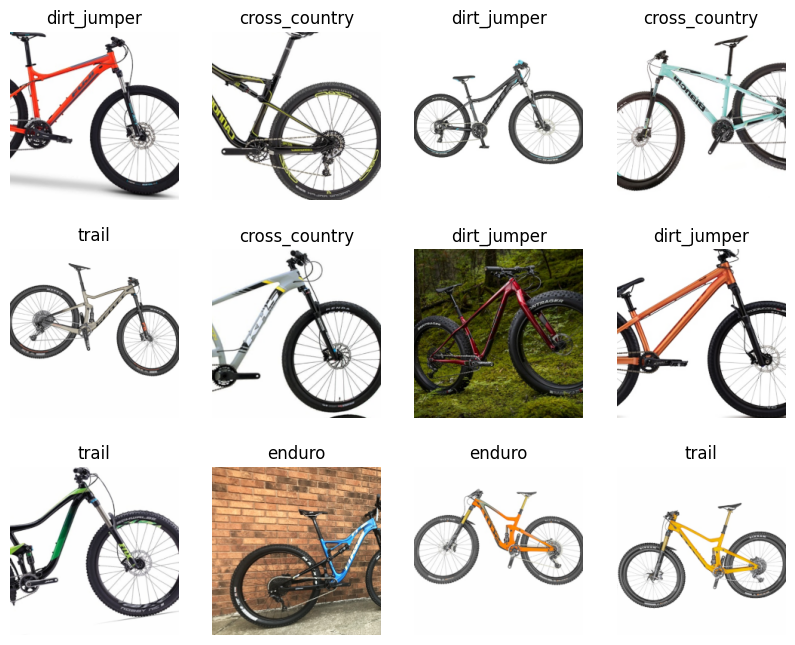

In [ ]:
# Check 12 labeled images
dls.show_batch(max_n=12, figsize=(10,8))

We verified that the images and labels load correctly.The dataset includes balanced categories for cross_country, trail, and downhill bikes, with proper augmentations like rotation and zoom applied during preprocessing.

## Modeling

We want to develop a classification system that classifies the mountain bike type into 1 of 4 categories: **Cross-country**, **Trail**, **Enduro** or **Donwhill**

We will use a deep neural network to build the classification model. Rather than training a network from scratch, we will modify an existing deep neural network to solve the problem of recognizing dogs vs. cats.

The model will be based on the ResNet-34 deep neural network that was trained on the [ImageNet](https://www.google.com/url?q=https%3A%2F%2Fwww.image-net.org%2F) dataset.

### Train & Test the Model

We will train a model to classify mountain bike types, starting from the resnet34 model that has already been trained to solve an image classification problem involing many types of images.

FastAI's `vision_learner` makes this very easy to perform. We create a vision_learner object by specifying 3 things:
1. the data block created above dls,
2. the name of the neural network we want to use as the basis for the model resnet34,
3. the metric we want to use to evaluate the performance of the model error_rate.

We can then fine tune the weights of the model to perform our specific task by minimizing the error for a specified number of epochs.

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 97.3MB/s]


In [ ]:
learn.fine_tune(epochs=1)

In [ ]:
learn.fine_tune(3)

In the aboce code we ran 2 **epochs parameters**:

- `learn.fine_tune(epochs=1)`

  - This ran 1 epoch total. This was a very quick 1 round through our datasetjust to test ot see if the code works and the data pipeline is correct.

- `learn.fine_tune(3)`

  - This ran 3 epochs total - or 1 frozen + 2 unforzen (by default).
  This gives the model enough time to actually learn features like tire shape, frame geometry, and suspension differences between bike types.

  - This is the same code we will run to fully train th emode, but in fine_tume(5) or (10).

### Assess Model Performance

We will use FastAI's `ClassificationInterpretation` function to help analyze the performance of the model.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

Plot the **confusion matrix** - to show the number of images in the validation set that were corrently and incorrectly classified by the model.

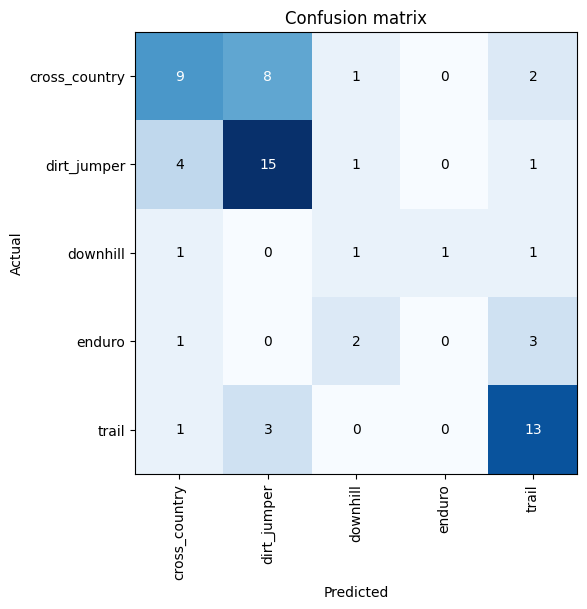

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6))

Now show the **top loss images** -- so that we can see where the model made the largest mistake by a high probability that the image was one class when it was actually a different type.

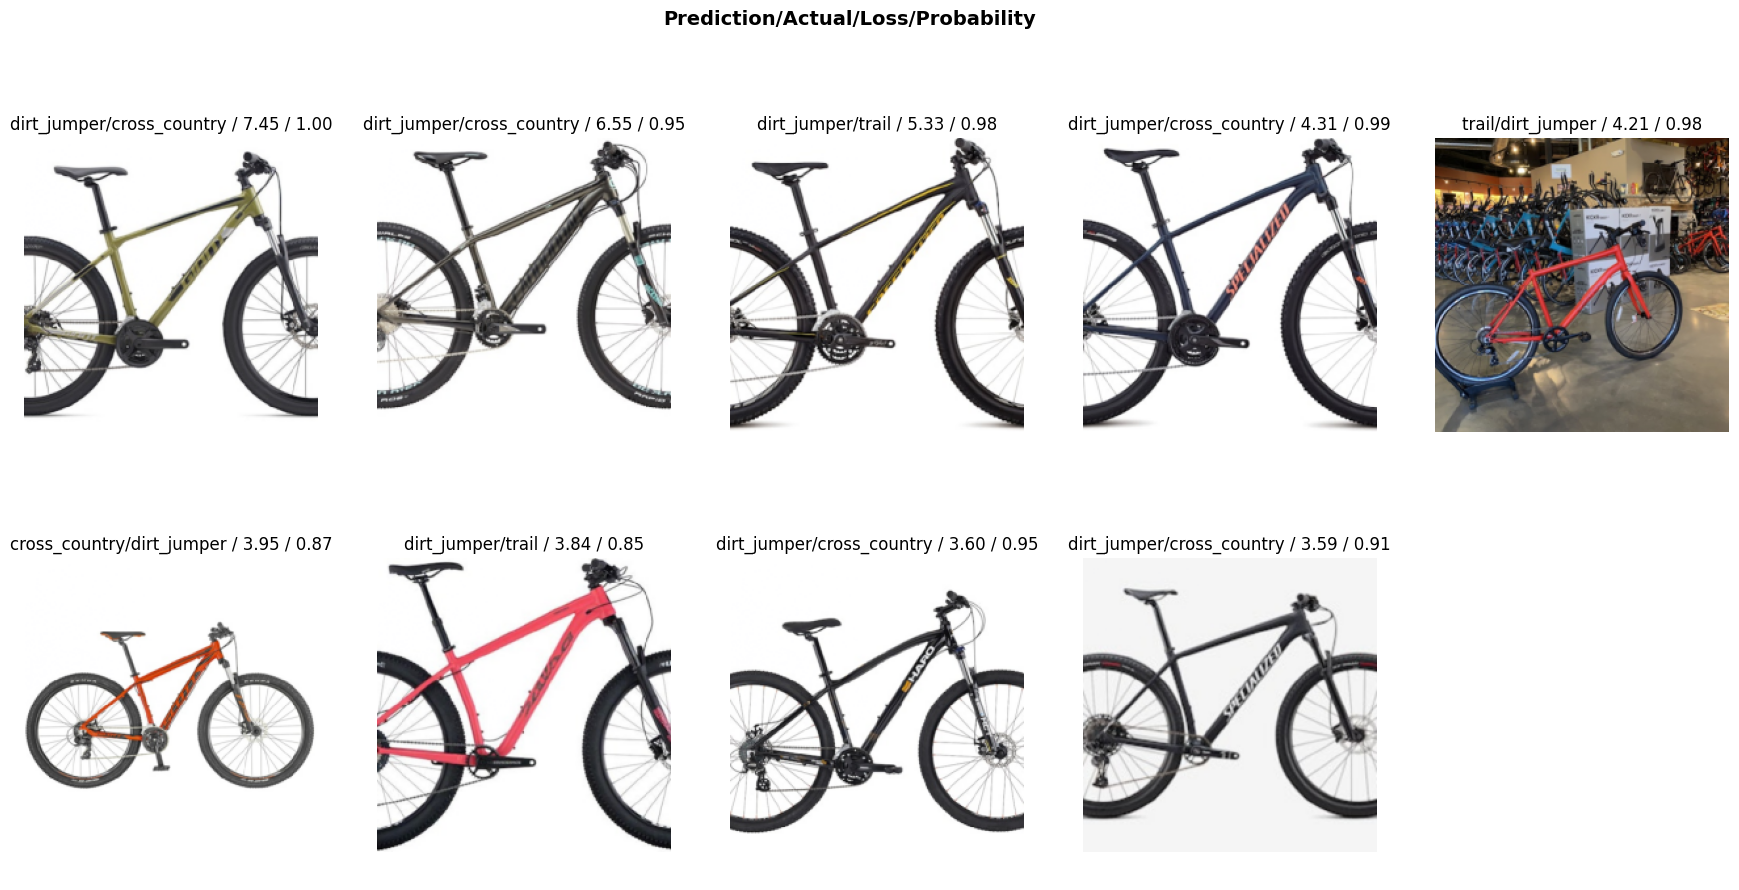

In [ ]:
# show 9 top-loss images
interp.plot_top_losses(9, nrows=2, figsize=(22,10))

**Summary:** The confusion matrix shows strong accuracy across most mountain bike riding styles. Misclassifications mainly occur between trail, dirt_jumper, and cross_country - which share similar visual geometry.

## Deployment

We can now use the model to predict the bike riding style for an example image and plot the class probabilities.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Make sure `file_names` is called to correctly in our code:

In [ ]:
# stage2_path = "/content/data/stage2" from when we created the folder before
file_names = get_image_files(stage2_path)


#### Visualize One Prediction (Professor's Example)

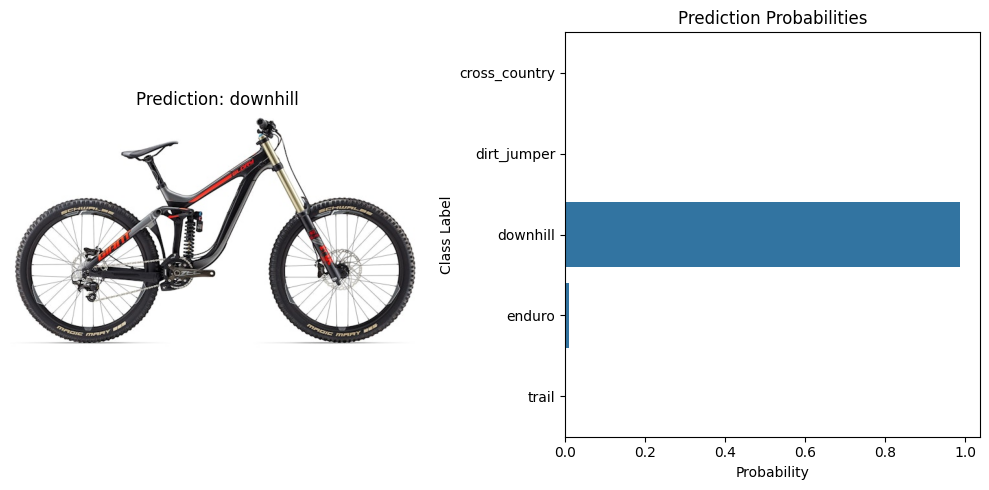

In [ ]:
# Plot the Confusion Matrix to see which classes get confused
img = PILImage.create(file_names[3])
prediction, _, probs = learn.predict(img)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Display the image in the first subplot
axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title(f"Prediction: {prediction}")

# Display the bar plot in the second subplot
sns.barplot(x=probs, y=dls.vocab, orient='h', ax=axes[1])
axes[1].set_xlabel("Probability")
axes[1].set_ylabel("Class Label")
axes[1].set_title("Prediction Probabilities")

plt.tight_layout()
plt.show()

#### Predict From Other Images

We tested the model with one of our own images from our data set, but we can apply this to other images.

This will be a good way to test how accurate the model's predictions truly are.


###### Image 1

Let's see what the model predicts for this image here of an [ICAN Bike](https://icancycling.com/cdn/shop/products/bbx.jpg?v=1735998014)

--2025-11-08 23:34:01--  https://icancycling.com/cdn/shop/products/bbx.jpg?v=1735998014
Resolving icancycling.com (icancycling.com)... 23.227.38.32
Connecting to icancycling.com (icancycling.com)|23.227.38.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52584 (51K) [image/jpeg]
Saving to: ‘ican.jpg’

ican.jpg            100%[===================>]  51.35K  --.-KB/s    in 0s      

2025-11-08 23:34:01 (110 MB/s) - ‘ican.jpg’ saved [52584/52584]



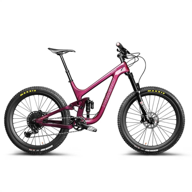

In [ ]:
# Download the image
!wget https://icancycling.com/cdn/shop/products/bbx.jpg?v=1735998014 -O ican.jpg

# Create the image
img = PILImage.create('ican.jpg')

# Plot the image
img.to_thumb(192)

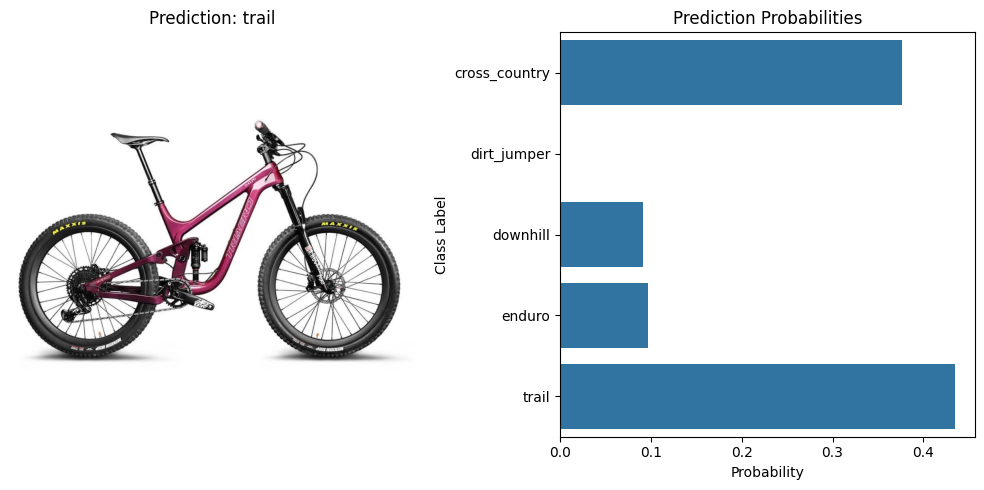

In [ ]:
# Run the prediction

prediction, _, probs = learn.predict(img)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the image in the first subplot
axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title(f"Prediction: {prediction}")

# Display the bar plot in the second subplot
sns.barplot(x=probs, y=dls.vocab, orient='h', ax=axes[1])
axes[1].set_xlabel("Probability")
axes[1].set_ylabel("Class Label")
axes[1].set_title("Prediction Probabilities")

plt.tight_layout()
plt.show()

###### Image 2

Let's see what the model predicts for this image here of an [RAW Enduro Bike](https://enduro-mtb.com/wp-content/uploads/2024/06/Best_Enduro_2024_Test_RAAW_Madonna_V3_060_WEB_Res-4926.jpg)

--2025-11-08 23:34:08--  https://enduro-mtb.com/wp-content/uploads/2024/06/Best_Enduro_2024_Test_RAAW_Madonna_V3_060_WEB_Res-4926.jpg
Resolving enduro-mtb.com (enduro-mtb.com)... 138.201.228.125
Connecting to enduro-mtb.com (enduro-mtb.com)|138.201.228.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 434884 (425K) [image/jpeg]
Saving to: ‘raw.jpg’

raw.jpg             100%[===================>] 424.69K   864KB/s    in 0.5s    

2025-11-08 23:34:09 (864 KB/s) - ‘raw.jpg’ saved [434884/434884]



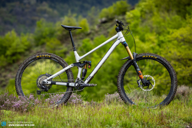

In [ ]:
# Download the image
!wget https://enduro-mtb.com/wp-content/uploads/2024/06/Best_Enduro_2024_Test_RAAW_Madonna_V3_060_WEB_Res-4926.jpg -O raw.jpg

# Create the image
img = PILImage.create('raw.jpg')

# Plot the image
img.to_thumb(192)

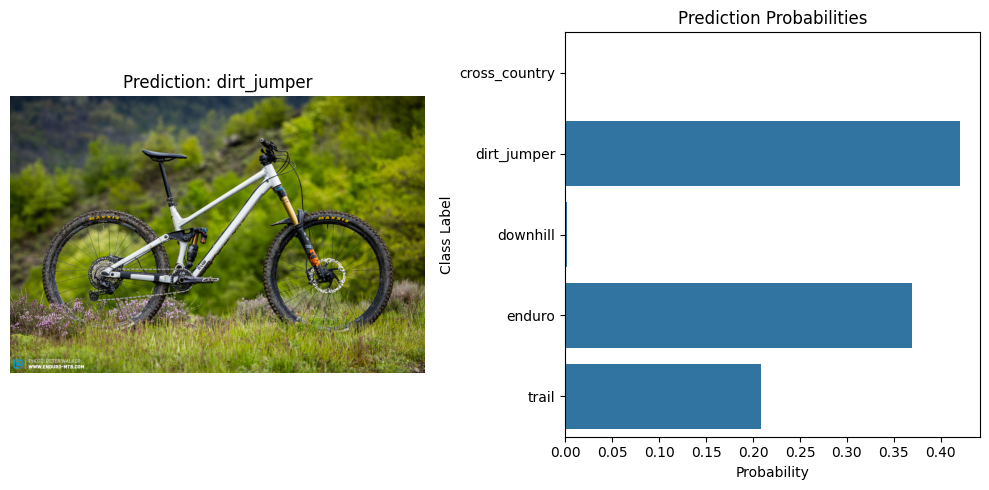

In [ ]:
# Run the prediction

prediction, _, probs = learn.predict(img)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the image in the first subplot
axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title(f"Prediction: {prediction}")

# Display the bar plot in the second subplot
sns.barplot(x=probs, y=dls.vocab, orient='h', ax=axes[1])
axes[1].set_xlabel("Probability")
axes[1].set_ylabel("Class Label")
axes[1].set_title("Prediction Probabilities")

plt.tight_layout()
plt.show()

##### Image 3

Let's see what the model predicts for this image here of a [COMMENCAL Bike](https://off.road.cc/sites/default/files/styles/970wide/public/thumbnails/image/2024%20commencal%20meta%20sx%20400%20hero.jpg?itok=I83E-jLa)

--2025-11-08 23:35:45--  https://off.road.cc/sites/default/files/styles/970wide/public/thumbnails/image/2024%20commencal%20meta%20sx%20400%20hero.jpg?itok=I83E-jLa
Resolving off.road.cc (off.road.cc)... 94.130.145.107
Connecting to off.road.cc (off.road.cc)|94.130.145.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128642 (126K) [image/jpeg]
Saving to: ‘commencal.jpg’

commencal.jpg       100%[===================>] 125.63K   417KB/s    in 0.3s    

2025-11-08 23:35:46 (417 KB/s) - ‘commencal.jpg’ saved [128642/128642]



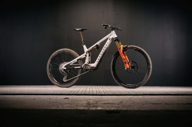

In [ ]:
# Download the image
!wget https://off.road.cc/sites/default/files/styles/970wide/public/thumbnails/image/2024%20commencal%20meta%20sx%20400%20hero.jpg?itok=I83E-jLa -O commencal.jpg

# Create the image
img = PILImage.create('commencal.jpg')

# Plot the image
img.to_thumb(192)

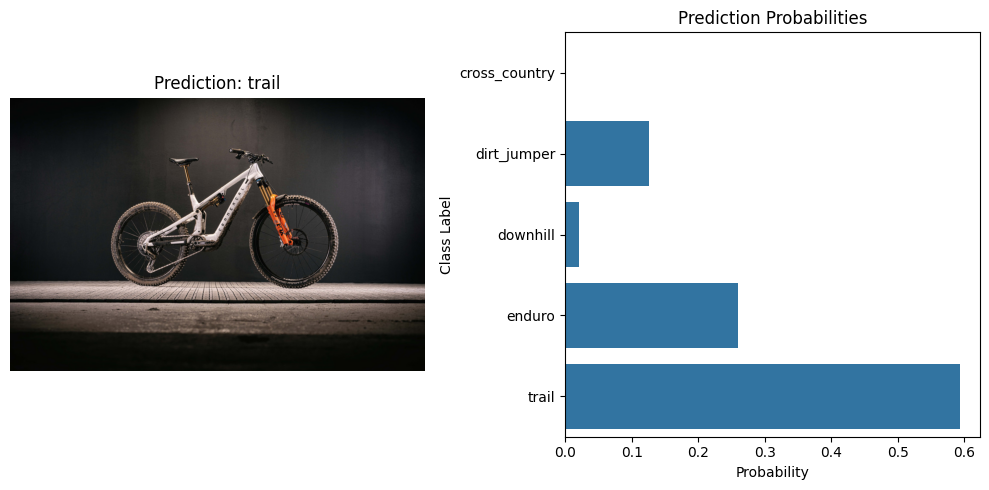

In [ ]:
# Run the prediction

prediction, _, probs = learn.predict(img)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the image in the first subplot
axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title(f"Prediction: {prediction}")

# Display the bar plot in the second subplot
sns.barplot(x=probs, y=dls.vocab, orient='h', ax=axes[1])
axes[1].set_xlabel("Probability")
axes[1].set_ylabel("Class Label")
axes[1].set_title("Prediction Probabilities")

plt.tight_layout()
plt.show()

##### Image 4

Let's see what the model predicts for this image here of a [Polygon Downhill Bike](https://encrypted-tbn3.gstatic.com/shopping?q=tbn:ANd9GcSRu1O-seX-YIcPU-_YTvj_KdQT3S4cE3WKQ42Ti-9nvecxANmPqM1ha__JTxfnTDmeTkhFCnag6nmJRd5qT3Gyo0N5wR5iR2tiDs6LP6d84cgZEynpW0nD)

--2025-11-08 23:37:44--  https://encrypted-tbn3.gstatic.com/shopping?q=tbn:ANd9GcSRu1O-seX-YIcPU-_YTvj_KdQT3S4cE3WKQ42Ti-9nvecxANmPqM1ha__JTxfnTDmeTkhFCnag6nmJRd5qT3Gyo0N5wR5iR2tiDs6LP6d84cgZEynpW0nD
Resolving encrypted-tbn3.gstatic.com (encrypted-tbn3.gstatic.com)... 74.125.137.139, 74.125.137.101, 74.125.137.100, ...
Connecting to encrypted-tbn3.gstatic.com (encrypted-tbn3.gstatic.com)|74.125.137.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19888 (19K) [image/webp]
Saving to: ‘polygon.jpg’

polygon.jpg         100%[===================>]  19.42K  --.-KB/s    in 0s      

2025-11-08 23:37:44 (84.8 MB/s) - ‘polygon.jpg’ saved [19888/19888]



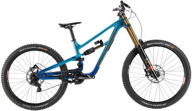

In [ ]:
# Download the image
!wget https://encrypted-tbn3.gstatic.com/shopping?q=tbn:ANd9GcSRu1O-seX-YIcPU-_YTvj_KdQT3S4cE3WKQ42Ti-9nvecxANmPqM1ha__JTxfnTDmeTkhFCnag6nmJRd5qT3Gyo0N5wR5iR2tiDs6LP6d84cgZEynpW0nD -O polygon.jpg

# Create the image
img = PILImage.create('polygon.jpg')

# Plot the image
img.to_thumb(192)

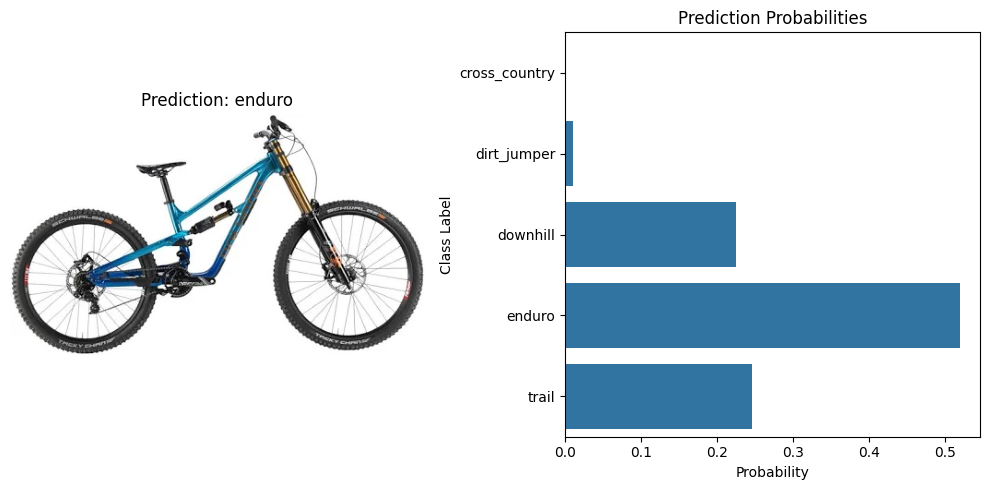

In [ ]:
# Run the prediction

prediction, _, probs = learn.predict(img)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the image in the first subplot
axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title(f"Prediction: {prediction}")

# Display the bar plot in the second subplot
sns.barplot(x=probs, y=dls.vocab, orient='h', ax=axes[1])
axes[1].set_xlabel("Probability")
axes[1].set_ylabel("Class Label")
axes[1].set_title("Prediction Probabilities")

plt.tight_layout()
plt.show()

## Evaluation

Some of the images used above are tough bikes to catagorize, even for a human being who knows a lot about bikes.

I knew that teaching a modle to classify riding styles of a bike based off a set of visual variables would be hard - but I am actually surprised at what the model was able to output.
<br>
<br>
For example:

- In Image 1, it is a fair analysis that the model put this as both cross_country and trail... because this is a popular bike used for both cross country and trail riding!

- In Image 2, altough this bike is marketed as an enduro bike, many riders actually do use this as a dirt_jumper... so again, the models display was actually not "inaccurate", and I am very impressed that it was able to pick up on this.

- In Image 3, the model shows higher confidence in trail riding style.. and this is accurate! The modle displaying some efforts towards the other catagories makes sense - as the bikes fork (front suspension) is usually used for enduro bikes. This tells me that the model was able to pick up on these idfferences while still taking the other details into consideration.

- In Image 4, this image used is of a very new bike in the market. So new that only professional riders get access to it as of now. The model predicted this as an enduro bike, and although that is not how this bike is marketed as, many of the prefessional riders assigned to test-riding this bike are saying that it rides more like an enduro bike.

Overall, there are a lot of characteristics that go into the "riding style" of a bike.... and as you can tell... the way a bike is marketed is not always the riding style that it is mostly used for.

Things like geometry, wheel size, suspension, etc. all makr a difference in the way the bike rides, thus a lot of bike companies are tending to interchange these features to make hybrid-like bikes. I guess you can call this a marketing tactic.

Based off of the outputs, I do see how the model is classifying these bikes and I believe it did a fantastic job a analyzing these features to predict the riding style of the bike in each image!

#### Expansions

I believe the biggest things that could help make the model more accurate would be **limiting the image amount for each category.**
<br>

For example, our data folder had the folowing image amount for each riding style:

- trail: 390
- cross_country	322
- dirt_jumper	133
- enduro	25
- downhill	19

Since the model seems to lean more biased towards categories that have more images -- having a data folder with equal image amounts for each would be ideal.



Another thing that would cake the model more accurate would be to go back and **add images into the supplemental image folder** that we originally address earlier.

This was intentially left in the notebook to show the thought process throughout this analysis... and after building the model and running a few tests - although I can perosnally see that the way the model is classifying these images is not technically inaccurate - to someone else who does not understand riding styles as well as I do, this might not be so clear.